In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Grazie Lowrenzo for Data Preparation

## <3 <3 <3

In [2]:
df = pd.read_csv("kids_train_cleaned.csv")
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,PurchMonth,PurchDay,PurchWeekDay,EngineLiters,NumCylinders,4X4,WheelDrive,NumDoors,PCA1,PCA2
0,326,1,10/25/2010,ADESA,2008.0,2.0,KIA,SPECTRA,EX,SEDAN,...,10.0,25.0,Monday,4.11398,5.0,0,0,4.0,1797.080405,-753.566708
1,42991,0,5/27/2009,MANHEIM,2006.0,3.0,CHRYSLER,STRATUS,SXT,SEDAN,...,5.0,27.0,Wednesday,2.70000,6.0,0,0,4.0,-4879.356480,1637.798453
2,55273,0,3/18/2010,OTHER,2008.0,2.0,CHRYSLER,CALIBER,SE,WAGON,...,3.0,18.0,Thursday,2.31289,6.0,0,0,4.0,4349.541129,-467.358818
3,29058,0,6/8/2009,OTHER,2005.0,4.0,FORD,FREESTAR,S,MINIVAN,...,6.0,8.0,Monday,3.90000,6.0,NO,Front,5.0,-5514.286888,1633.449461
4,34991,0,3/4/2009,MANHEIM,2005.0,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,MINIVAN,...,3.0,4.0,Wednesday,3.30000,4.0,NO,Front,5.0,-4594.389176,1693.004506


In [3]:
for e in df.columns:
    print(e)

RefId
IsBadBuy
PurchDate
Auction
VehYear
VehicleAge
Make
Model
Trim
SubModel
Color
Transmission
WheelType
VehOdo
Nationality
AAAP
AACP
ARAP
ARCP
CAAP
CACP
CRAP
CRCP
BYRNO
VNST
VehBCost
WarrantyCost
PurchYear
PurchMonth
PurchDay
PurchWeekDay
EngineLiters
NumCylinders
4X4
WheelDrive
NumDoors
PCA1
PCA2


In [4]:
categories = ['Model', 'Make', 'Trim', 'BYRNO', 'WheelType', 'Color', 'VNST']

not_cat = ['VehOdo', 'VehBCost', 'WarrantyCost', 'AAAP', 'VehicleAge']

to_drop = ['AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP', 'CRCP', 'NumCylinders', '4X4', 'WheelDrive',
           'NumDoors', 'PCA1', 'PCA2', 'RefId', 'PurchDate', 'PurchYear', 'PurchMonth',
            'PurchDay', 'VehYear', 'EngineLiters', 'Auction', 'PurchWeekDay','IsBadBuy',
'Transmission', 'Nationality','SubModel']

In [5]:
df.drop(columns= to_drop, axis=1, inplace=True) 

In [6]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost
0,2.0,KIA,SPECTRA,EX,BLUE,Covers,61184,6796.0,5546,FL,6100.0,533
1,3.0,CHRYSLER,STRATUS,SXT,SILVER,Covers,92383,5480.0,99750,FL,4000.0,1630
2,2.0,CHRYSLER,CALIBER,SE,BLACK,Covers,45965,8067.0,99761,OK,7500.0,693
3,4.0,FORD,FREESTAR,S,BROWN,Covers,80169,4817.0,99761,AZ,4725.0,1633
4,4.0,CHRYSLER,TOWN & COUNTRY V,Bas,BLUE,Alloy,77372,5430.0,20833,TX,5670.0,1623


In [7]:
df['WheelType'].fillna('Unknown', inplace=True)

In [8]:
for col in categories:
    df[col] = df[col].astype('category')
    
df['VehicleAge'] = df['VehicleAge'].astype('int')

In [9]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

## Binning

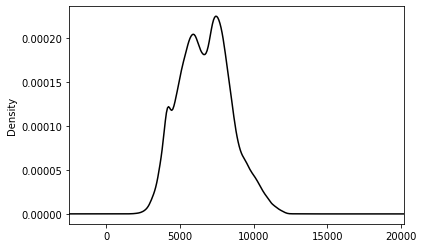

In [10]:
x = plt.xlim((-2500, 20200))
df["VehBCost"].plot.kde(x = 'x', color = 'black') 

In [11]:
bins = [df.VehBCost.min() - 1,5000, 7000, 8000, 10000, df.VehBCost.max()]

df['VehBCost'] = pd.cut(df['VehBCost'], bins)

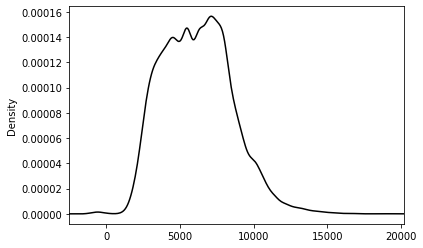

In [12]:
x = plt.xlim((-2500, 20200))
df["AAAP"].plot.kde(x = 'x', color = 'black') 

In [13]:
bins = [df.AAAP.min() - 1, 3000, 6000, 8000, 10000, df.AAAP.max()]

df['AAAP'] = pd.cut(df['AAAP'], bins)

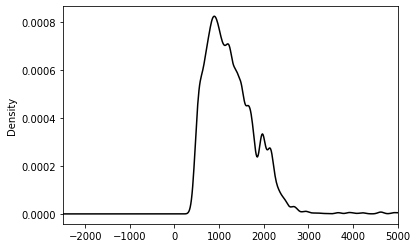

In [14]:
x = plt.xlim((-2500, 5000))
df["WarrantyCost"].plot.kde(x = 'x', color = 'black') 

In [15]:
bins = [df.WarrantyCost.min() - 1,700, 1200, 1800, 2600, df.WarrantyCost.max()]

df['WarrantyCost'] = pd.cut(df['WarrantyCost'], bins)

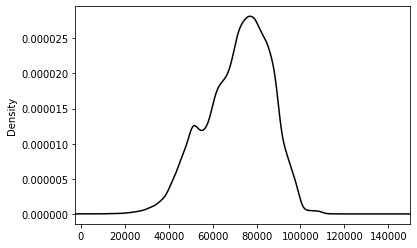

In [16]:
x = plt.xlim((-2500, 150000))
df["VehOdo"].plot.kde(x = 'x', color = 'black') 

In [17]:
bins = [df.VehOdo.min() - 1,40000, 60000, 80000, 100000, df.VehOdo.max()]

df['VehOdo'] = pd.cut(df['VehOdo'], bins)

In [18]:
df['VehicleAge'] = pd.cut(df['VehicleAge'], [0, 2, 4, 6, 8, 10], right=False)

Remapping Values

In [19]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost
0,"[2, 4)",KIA,SPECTRA,EX,BLUE,Covers,"(60000, 80000]","(6000.0, 8000.0]",5546,FL,"(5000.0, 7000.0]","(461, 700]"
1,"[2, 4)",CHRYSLER,STRATUS,SXT,SILVER,Covers,"(80000, 100000]","(3000.0, 6000.0]",99750,FL,"(224.0, 5000.0]","(1200, 1800]"
2,"[2, 4)",CHRYSLER,CALIBER,SE,BLACK,Covers,"(40000, 60000]","(8000.0, 10000.0]",99761,OK,"(7000.0, 8000.0]","(461, 700]"
3,"[4, 6)",FORD,FREESTAR,S,BROWN,Covers,"(80000, 100000]","(3000.0, 6000.0]",99761,AZ,"(224.0, 5000.0]","(1200, 1800]"
4,"[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,BLUE,Alloy,"(60000, 80000]","(3000.0, 6000.0]",20833,TX,"(5000.0, 7000.0]","(1200, 1800]"


In [20]:
df['VehicleAge'] = 'Age:' + df['VehicleAge'].astype(str)
df['VehOdo'] = 'Odo:' + df['VehOdo'].astype(str)
df['AAAP'] = 'AAAP:' + df['AAAP'].astype(str)
df['WarrantyCost'] = 'WarrCost:' + df['WarrantyCost'].astype(str)
df['VehBCost'] = 'VehBCost:' + df['VehBCost'].astype(str)

#df['BuyStatus'] = df['IsBadBuy'].map(
    #{0: 'GoodBuy', 1: 'BadBuy'}).astype(str)
#df.drop(columns=['IsBadBuy'], inplace=True)


In [21]:
df.head()

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost
0,"Age:[2, 4)",KIA,SPECTRA,EX,BLUE,Covers,"Odo:(60000, 80000]","AAAP:(6000.0, 8000.0]",5546,FL,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]"
1,"Age:[2, 4)",CHRYSLER,STRATUS,SXT,SILVER,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",99750,FL,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]"
2,"Age:[2, 4)",CHRYSLER,CALIBER,SE,BLACK,Covers,"Odo:(40000, 60000]","AAAP:(8000.0, 10000.0]",99761,OK,"VehBCost:(7000.0, 8000.0]","WarrCost:(461, 700]"
3,"Age:[4, 6)",FORD,FREESTAR,S,BROWN,Covers,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",99761,AZ,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]"
4,"Age:[4, 6)",CHRYSLER,TOWN & COUNTRY V,Bas,BLUE,Alloy,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",20833,TX,"VehBCost:(5000.0, 7000.0]","WarrCost:(1200, 1800]"


In [22]:
sum_ = df.isnull().sum()
sum_[sum_ != 0]

Series([], dtype: int64)

In [23]:
len(df[df.WheelType == 'Unknown'])

2575

Sostituzioni per Marta

In [24]:
df['WheelTypeSost'] = df['WheelType']

In [25]:
df['WheelTypeSost'] = np.where((np.logical_and(df['Make'] == 'FORD' ,df['WheelTypeSost'] == 'Unknown')),str('Alloy'), df['WheelTypeSost'])

In [26]:
ppp = np.logical_and(df['VehicleAge'] == 'Age:[2, 4)' ,df['VehBCost'] == 'VehBCost:(5000.0, 7000.0]')

df['WheelTypeSost'] = np.where(np.logical_and(ppp,df['WheelTypeSost'] == 'Unknown'),str('Covers'), df['WheelTypeSost'])

In [57]:
df[df.WheelType != df.WheelTypeSost]

,VehicleAge,Make,Model,Trim,Color,WheelType,VehOdo,AAAP,BYRNO,VNST,VehBCost,WarrantyCost,WheelTypeSost
66,"Age:[4, 6)",FORD,MUSTANG,Bas,RED,Unknown,"Odo:(60000, 80000]","AAAP:(8000.0, 10000.0]",1235,UT,"VehBCost:(8000.0, 10000.0]","WarrCost:(700, 1200]",Alloy
124,"Age:[4, 6)",FORD,FOCUS,ZX4,SILVER,Unknown,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",20740,MD,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Alloy
125,"Age:[6, 8)",FORD,F150,XL,WHITE,Unknown,"Odo:(80000, 100000]","AAAP:(3000.0, 6000.0]",52644,TX,"VehBCost:(7000.0, 8000.0]","WarrCost:(700, 1200]",Alloy
343,"Age:[2, 4)",SUZUKI,FORENZA,38.3446413114107,GREY,Unknown,"Odo:(40000, 60000]","AAAP:(3000.0, 6000.0]",20928,FL,"VehBCost:(5000.0, 7000.0]","WarrCost:(461, 700]",Covers
381,"Age:[2, 4)",FORD,FOCUS,ZX4,BEIGE,Unknown,"Odo:(40000, 60000]","AAAP:(3000.0, 6000.0]",19619,NC,"VehBCost:(5000.0, 7000.0]","WarrCost:(700, 1200]",Alloy
496,"Age:[4, 6)",FORD,FREESTAR,SE,SILVER,Unknown,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",18880,SC,"VehBCost:(5000.0, 7000.0]","WarrCost:(1200, 1800]",Alloy
498,"Age:[6, 8)",FORD,FOCUS,SE,SILVER,Unknown,"Odo:(60000, 80000]","AAAP:(-1225.765, 3000.0]",22808,OK,"VehBCost:(224.0, 5000.0]","WarrCost:(1200, 1800]",Alloy
514,"Age:[2, 4)",FORD,MUSTANG,Bas,SILVER,Unknown,"Odo:(80000, 100000]","AAAP:(10000.0, 35722.0]",20833,TX,"VehBCost:(8000.0, 10000.0]","WarrCost:(700, 1200]",Alloy
566,"Age:[2, 4)",FORD,RANGER PICKUP,XL,WHITE,Unknown,"Odo:(60000, 80000]","AAAP:(6000.0, 8000.0]",99761,CA,"VehBCost:(224.0, 5000.0]","WarrCost:(461, 700]",Alloy
630,"Age:[6, 8)",FORD,F150,XL,RED,Unknown,"Odo:(60000, 80000]","AAAP:(3000.0, 6000.0]",22916,CO,"VehBCost:(5000.0, 7000.0]","WarrCost:(700, 1200]",Alloy


In [58]:
len(df[df.WheelType != df.WheelTypeSost])

727

## Guidelines for the task on Association Rules Mining

-Frequent patterns extraction with different values of support and different types (i.e. frequent, close, maximal), (6 points)

-Discussion of the most interesting frequent patterns and analyze how changes the number of patterns w.r.t. the min_sup parameter (7 points)
    
-Association rules extraction with different values of confidence (6 points)
    
-Discussion of the most interesting rules and analyze how changes the number of rules w.r.t. the min_conf parameter, histogram of rules' confidence and lift (7 points)
    
-Use the most meaningful rules to replace missing values and evaluate the accuracy (2 points)

-Use the most meaningful rules to predict the target variable and evaluate the accuracy (2 points)

## APRIORI

In [27]:
from fim import apriori

In [28]:
#in questo modo creiamo i baskets, cioé selezioniamo gli attributi per ogni riga corrispondente
baskets = df.values.tolist()

## Itemset Frequenti


In [29]:
#supporto 2
itemsets = apriori(baskets, supp=10, zmin=3, target='a')

In [30]:
print('Number of itemsets:', len(itemsets))

itemsets[0]

Number of itemsets: 6


(('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 6798)

In [31]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [32]:
itemsets

[(('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 6798),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Covers'), 6653),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'Covers'), 6458),
 (('Age:[4, 6)', 'Odo:(60000, 80000]', 'Alloy'), 6392),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)', 'Odo:(60000, 80000]'), 6222),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]', 'Odo:(60000, 80000]'),
  5936)]

## how changes the number of patterns with target "all"

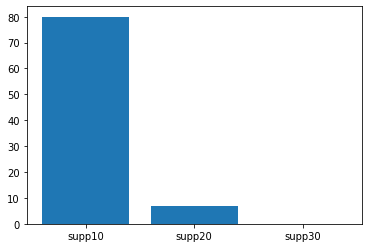

In [33]:
#rappresento graficamente come cambia il numero di pattern al cambiare del supporto

height = [80, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()



## Itemset Massimali

In [34]:
itemsets = apriori(baskets, supp=20, zmin=2, target='m')

In [35]:
print('Number of itemsets:', len(itemsets))

itemsets[1]

Number of itemsets: 7


(('VehBCost:(5000.0, 7000.0]', 'Covers'), 12122)

In [36]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [37]:
itemsets[:10]

[(('Odo:(60000, 80000]', 'Alloy'), 14168),
 (('AAAP:(3000.0, 6000.0]', 'Age:[4, 6)'), 12846),
 (('Age:[4, 6)', 'Alloy'), 12782),
 (('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]'), 12540),
 (('VehBCost:(5000.0, 7000.0]', 'Covers'), 12122),
 (('Covers', 'Odo:(60000, 80000]'), 11983),
 (('Age:[4, 6)', 'Odo:(60000, 80000]'), 11748)]

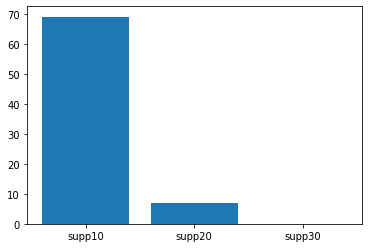

In [38]:
height = [69, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

##  Itemset Closed

In [39]:
itemsets = apriori(baskets, supp=20, zmin=3, target='c')

In [40]:
print('Number of itemsets:', len(itemsets))

Number of itemsets: 0


In [41]:
itemsets.sort(key=lambda x: x[1],reverse=True)

In [42]:
itemsets

[]

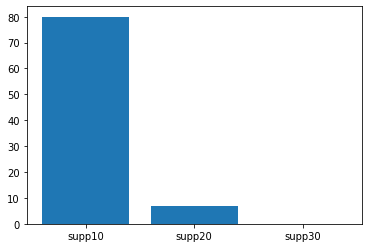

In [43]:
height = [80, 7, 0]
bars = ('supp10', 'supp20', 'supp30')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

## ASSOCIATION RULES 

In [44]:
rules = apriori(baskets, supp=10, zmin=2, target='r', conf=67, 
                report='ascl')

In [45]:
print('Number of rule:', len(rules))
rules[0]

Number of rule: 6


('GM',
 ('LS',),
 6303,
 0.1079576596327761,
 0.7689398560448945,
 2.273563484013224)

In [46]:
rules.sort(key=lambda x: x[4],reverse=True)

CODICE DA RIVEDERE

count = 1
Cyan = True
for r in rules:
    if(r[4]>0.8 and r[4]):
        if(Cyan):
            Cyan = False
            print (" \rowcolor{cyan!20} ",count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\")
        else:
            Cyan = True
            print (count, " & ",r[1]," & ", r[0], " & ", r[4], " & ", r[5],"\%\\")
        count += 1

In [47]:
count = 0
for r in rules:
    if r[5] > 0.67 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break
            
# i primi formano l'association rule, quindi vuol dire che quando ho AUTO ho spesso anche (AMERICAN, goodbuy)
# il terzo elemento è il support dell'itemset
# il quarto elemento è il support relativo espresso come frazione
# il quinto è la confidence della rule
# il sesto è il lift value.

('GM', ('LS',), 6303, 0.1079576596327761, 0.7689398560448945, 2.273563484013224)
('Alloy', ('FORD',), 7536, 0.1290764593039189, 0.7674915979223954, 1.5347728953658422)
('GM', ('WarrCost:(1800, 2600]',), 6239, 0.10686146889558783, 0.7363389590463826, 2.17717075787319)
('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)


## CAMBIO LA CONFIDENZA


In [48]:
rules = apriori(baskets, supp=10, zmin=3, target='r', conf=65, 
                report='ascl')

In [49]:
print('Number of rule:', len(rules))

Number of rule: 4


In [50]:
rules.sort(key=lambda x: x[4],reverse=True)

In [51]:
count = 0
for r in rules:
    if r[5] > 0.65 and r[5]:
        print(r)
        count += 1
        if count == 10:
            break

('AAAP:(3000.0, 6000.0]', ('VehBCost:(5000.0, 7000.0]', 'Age:[4, 6)'), 6798, 0.11643600986571663, 0.710864791383457, 1.7729561271362193)
('CHRYSLER', ('Odo:(40000, 60000]', 'WarrCost:(700, 1200]'), 4411, 0.07555152096464784, 0.6896497811131957, 2.1491600117700997)
('Covers', ('Age:[2, 4)', 'VehBCost:(5000.0, 7000.0]'), 5148, 0.08817484242258153, 0.6878674505611972, 1.5012692323115)
('Alloy', ('Odo:(80000, 100000]', 'WarrCost:(1200, 1800]'), 4957, 0.08490339819128528, 0.650952068286277, 1.3017257691062474)


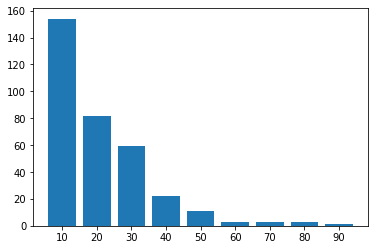

In [52]:
#Numero di regole prodotte all'aumentare del livello di confidenza

height = [154, 82, 59, 22, 11, 3, 3, 3, 1]
bars = ('10', '20', '30', '40', '50', '60', '70', '80', '90')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

DA RIVEDERE

#ScatterPlot con confidenza 40%

plt.scatter(support, lift, alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.show()


## dfcazzo bocciato ma per ora lo tengo

In [53]:
#dfcazzo = df[df['BuyStatus'] == 'BadBuy']
#dfcazzo.head()

In [54]:
#baskets2 = dfcazzo.values.tolist()

In [55]:
#itemsets2 = apriori(baskets2, supp=20, zmin=3, target='a')
#print('Number of itemsets:', len(itemsets2))


In [56]:
#itemsets2.sort(key=lambda x: x[1],reverse=True)
#itemsets2

('GoodBuy', ('Odo:(60000, 80000]', 'Alloy')

('GoodBuy', ('VehBCost:(5000.0, 7000.0]', 'AAAP:(3000.0, 6000.0]')